<a href="https://colab.research.google.com/github/ysibghaSE/Programming4AI/blob/main/Assignment_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

# Load dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Base.csv')

In [3]:
data.shape

(1000000, 32)

In [4]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200,0,INTERNET,3.743048,other,0,1,0,0


In [6]:
data.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [10]:
data.dtypes

,0
fraud_bool,int64
income,float64
name_email_similarity,float64
prev_address_months_count,int64
current_address_months_count,int64
customer_age,int64
days_since_request,float64
intended_balcon_amount,float64
payment_type,object
zip_count_4w,int64


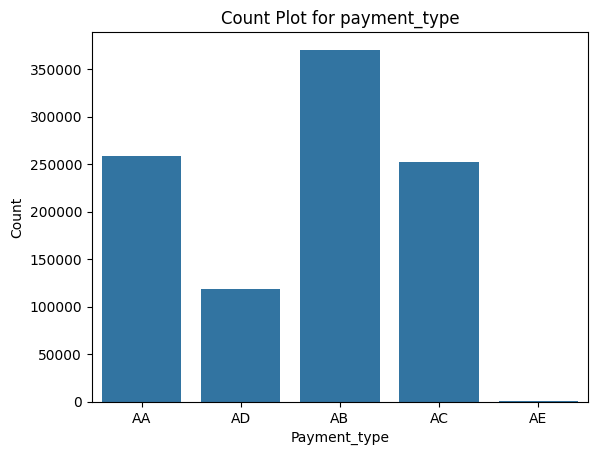

In [28]:
# uni-variant analysis

column='payment_type'

sns.countplot(x=column, data=data)
plt.title(f'Count Plot for {column}')
plt.xlabel(column.capitalize())
plt.ylabel('Count')
plt.show()

<Axes: xlabel='employment_status', ylabel='count'>

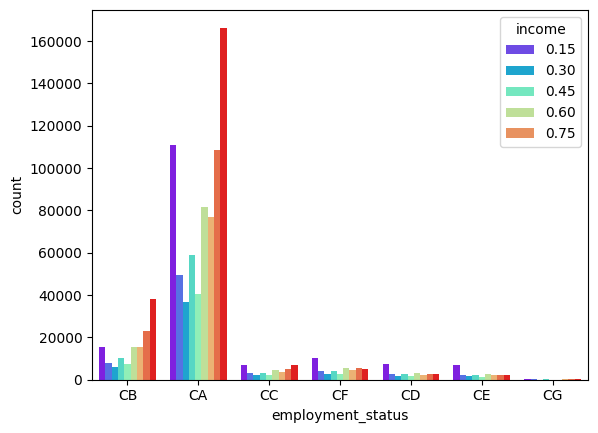

In [27]:
# uni-variant analysis

sns.countplot(x='employment_status', hue='income', data=data, palette='rainbow')

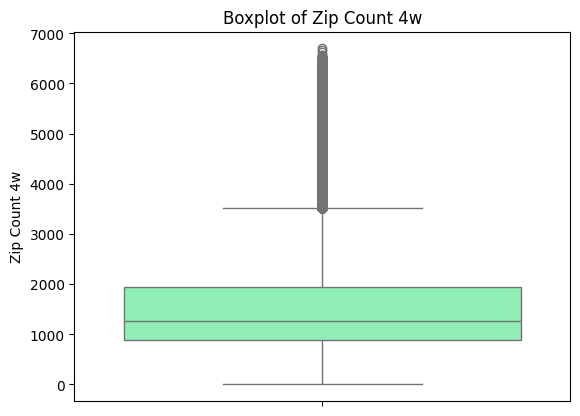

In [32]:
# uni-variant analysis

sns.boxplot(y=data['zip_count_4w'])
plt.title('Boxplot of Zip Count 4w')
plt.ylabel('Zip Count 4w')
plt.show()

<Axes: xlabel='income', ylabel='Count'>

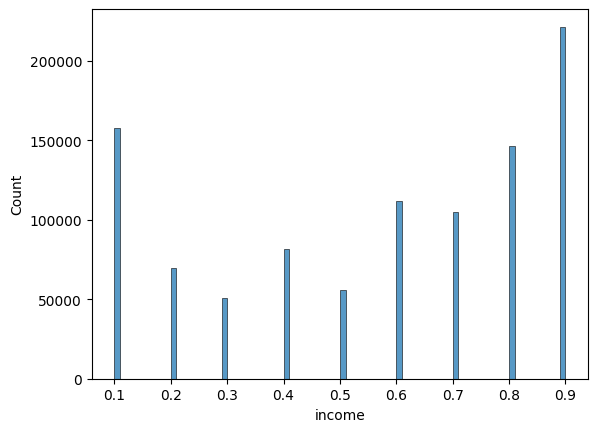

In [8]:
# uni-variant analysis

sns.histplot(data['income'])

<Axes: >

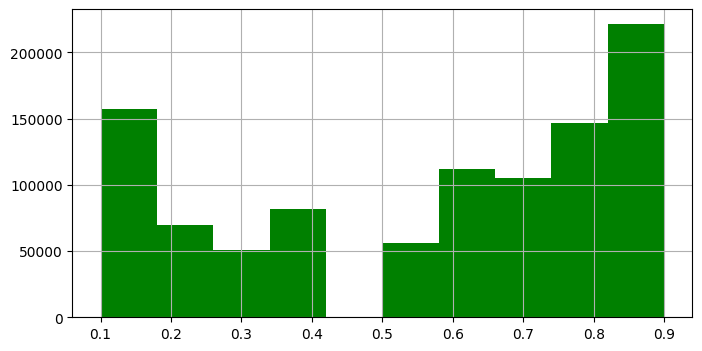

In [9]:
# uni-variant analysis

data['income'].hist(color='green', figsize=(8,4))

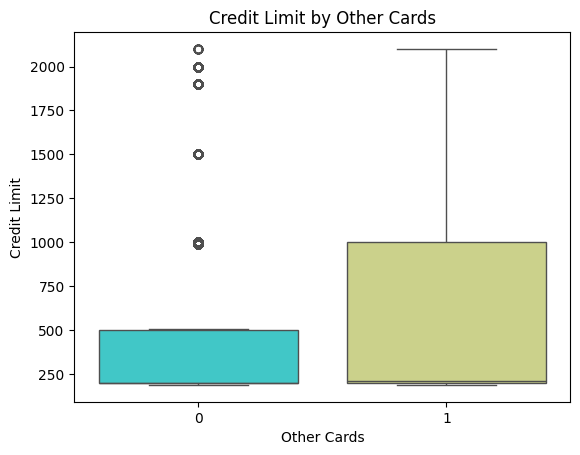

In [33]:
# bi-variant analysis

sns.boxplot(x='has_other_cards', y='proposed_credit_limit', data=data, palette='rainbow')
plt.title('Credit Limit by Other Cards')
plt.xlabel('Other Cards')
plt.ylabel('Credit Limit')
plt.show()

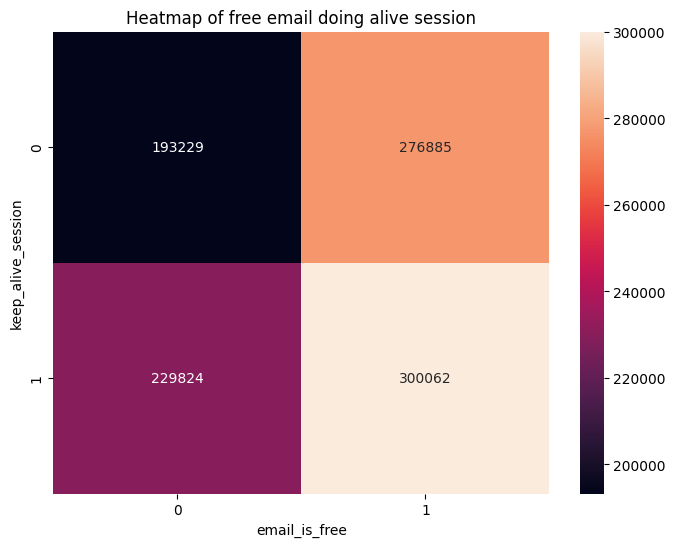

In [34]:
# bi-variant analysis

ct=pd.crosstab(data['email_is_free'], data['keep_alive_session'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Heatmap of free email doing alive session')
plt.xlabel('email_is_free')
plt.ylabel('keep_alive_session')
plt.show()

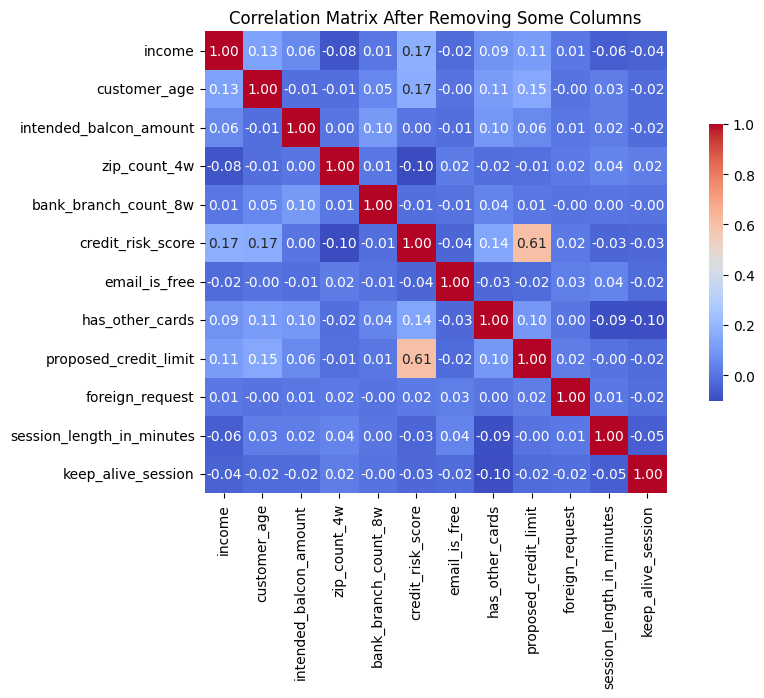

In [46]:
# multi-variant analysis

numerical_features = data.select_dtypes(include=['float64', 'int64'])

columns_to_remove = ['fraud_bool', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'prev_address_months_count', 'current_address_months_count', 'phone_home_valid', 'phone_mobile_valid', 'date_of_birth_distinct_emails_4w', 'name_email_similarity', 'days_since_request', 'device_distinct_emails_8w', 'bank_months_count', 'month', 'device_fraud_count']
numerical_features = numerical_features.drop(columns=columns_to_remove)

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(11, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .6})
plt.title('Correlation Matrix After Removing Some Columns')
plt.show()

<Axes: xlabel='device_os', ylabel='session_length_in_minutes'>

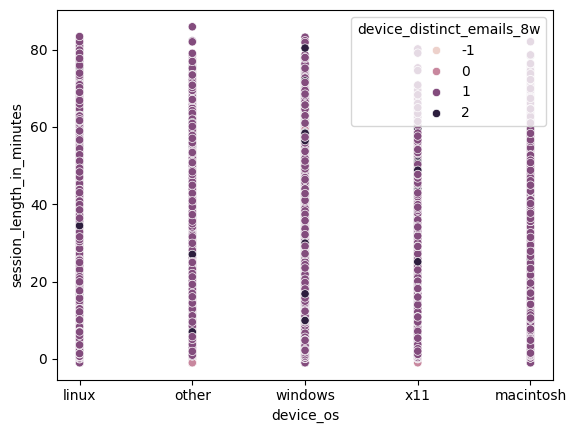

In [38]:
# multi-variant analysis

sns.scatterplot(x='device_os', y='session_length_in_minutes', hue='device_distinct_emails_8w', data=data)

In [7]:
# multi-variant analysis

sns.pairplot(data)

In [51]:
data.nunique()

,0
fraud_bool,2
income,9
name_email_similarity,998861
prev_address_months_count,374
current_address_months_count,423
customer_age,9
days_since_request,989330
intended_balcon_amount,994971
payment_type,5
zip_count_4w,6306


In [49]:
data['device_os'].unique()

array(['linux', 'other', 'windows', 'x11', 'macintosh'], dtype=object)

In [4]:
data.isnull().sum()

,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


In [28]:
data.drop(columns=['device_fraud_count', 'velocity_6h', 'velocity_24h', 'velocity_4w'], inplace=True)

In [29]:
data = data.rename(columns={'intended_balcon_amount':'intended_balance_amount'})

In [30]:
data.isnull()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balance_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
mean_values = data.groupby('has_other_cards')['credit_risk_score'].mean()
print(mean_values)

has_other_cards
0    125.782727
1    149.133169
Name: credit_risk_score, dtype: float64


In [31]:
data.loc[data.duplicated()]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balance_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month


In [23]:
data.loc[data.duplicated(subset=['credit_risk_score'])]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balance_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,25,1,200,0,INTERNET,11.234264,other,1,1,0
29,0,0.9,0.272416,-1,35,40,0.000048,-0.607132,AD,2243,...,15,0,200,0,INTERNET,2.598805,windows,1,1,0
36,0,0.8,0.028334,8,4,40,0.013875,-1.052110,AC,538,...,-1,0,200,0,INTERNET,5.549869,other,0,1,0
38,0,0.7,0.094435,24,18,20,0.001399,-1.323659,AA,2463,...,28,0,500,0,INTERNET,32.681056,macintosh,0,1,0
48,0,0.5,0.743169,-1,41,50,0.012817,14.357233,AA,3527,...,28,1,500,0,INTERNET,38.482143,other,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,31,0,1500,0,INTERNET,16.967770,other,0,1,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,-1,1,1000,0,INTERNET,1.504109,macintosh,0,1,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,31,0,200,0,INTERNET,16.068595,other,0,1,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,1,0,200,0,INTERNET,1.378683,linux,1,1,7


In [24]:
# Checking an example duplicate
data.query('credit_risk_score > 125')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balance_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500,0,INTERNET,3.363854,other,1,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,30,0,200,0,INTERNET,6.987316,linux,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,25,1,200,0,INTERNET,11.234264,other,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,15,0,1500,0,INTERNET,4.103970,other,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,0,0.9,0.046317,-1,132,50,0.035818,-1.504382,AD,576,...,1,0,200,0,INTERNET,3.632310,linux,0,1,7
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,31,0,1500,0,INTERNET,16.967770,other,0,1,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,-1,1,1000,0,INTERNET,1.504109,macintosh,0,1,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,31,0,200,0,INTERNET,16.068595,other,0,1,7


<Axes: >

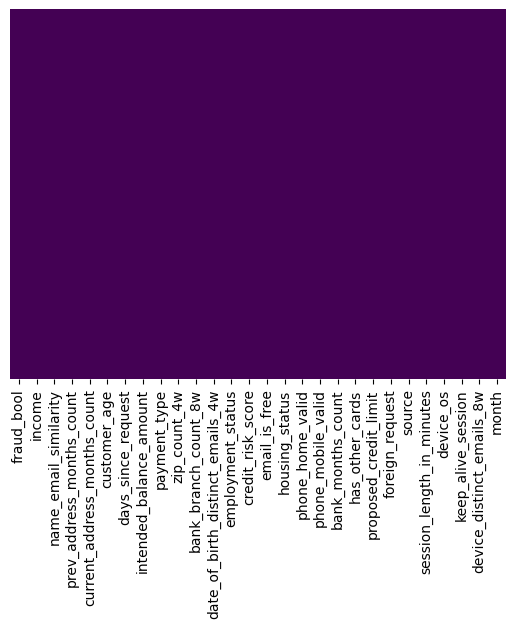

In [20]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balance_amount           1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  bank_branch_count_8w              1000000 non-null  int64  
 11  date_of_birth_distinct_emails_4w  1000

In [32]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balance_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200,0,INTERNET,3.743048,other,0,1,0


In [ ]:
# Custom Transformer for Imputation

class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, column_idx, strategy="mean"):
        self.column_idx = column_idx
        self.strategy = strategy
        self.value = None

    def fit(self, X, y=None):
        column_data = X[:, self.column_idx]
        if self.strategy == "mean":
            self.value = np.nanmean(column_data.astype(float))
        elif self.strategy == "mode":
            self.value = np.bincount(column_data[~np.isnan(column_data)].astype(int)).argmax()
        return self

    def transform(self, X, y=None):
        X = X.copy()
        column_data = X[:, self.column_idx]
        column_data[np.isnan(column_data.astype(float))] = self.value
        X[:, self.column_idx] = column_data
        return X


# Create the full pipeline for a NumPy array dataset
def create_pipeline():
    # Imputation for specific columns (indices instead of names)
    imputation_pipeline = Pipeline(steps=[
        ('impute_velocity_6h', Imputer(column_idx=5, strategy="mean")),  # Replace with appropriate indices
        ('impute_velocity_24h', Imputer(column_idx=6, strategy="mean"))
        # Add more columns as needed with respective strategies
    ])

    # One-hot encoding for specific categorical columns (by index)
    categorical_transformer = ColumnTransformer(
        transformers=[
            ('ohe_device', OneHotEncoder(sparse=False, handle_unknown='ignore'), [18]),  # Device column index
            ('ohe_source', OneHotEncoder(sparse=False, handle_unknown='ignore'), [16])  # Source column index
        ],
        remainder='passthrough'  # Keep the rest of the columns as is
    )

    # Combine both pipelines
    full_pipeline = Pipeline(steps=[
        ('imputations', imputation_pipeline),
        ('categorical_encoding', categorical_transformer)
    ])

    return full_pipeline


# Example Usage: Load dataset into a NumPy array
data = np.genfromtxt(data, delimiter=',', dtype=object, skip_header=1)

# Create and apply the pipeline
pipeline = create_pipeline()
transformed_data = pipeline.fit_transform(data)

print("Transformed Data:")
print(transformed_data)

In [ ]:
# Define numerical and categorical features
numerical_features = ['credit_risk_score', 'proposed_credit_limit', 'income', ...]  # Add other numerical features
categorical_features = ['device_os', 'source', ...]  # Add other categorical features

# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Use SimpleImputer for mean imputation
    ('scaler', StandardScaler())  # Optional: Add scaling if needed
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use SimpleImputer for mode imputation
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Use OneHotEncoder for categorical encoding
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply the preprocessor to the data
transformed_data = preprocessor.fit_transform(data)

In [ ]:
transformed_data.head()

In [ ]:
transformed_data.dtypes